In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [5]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



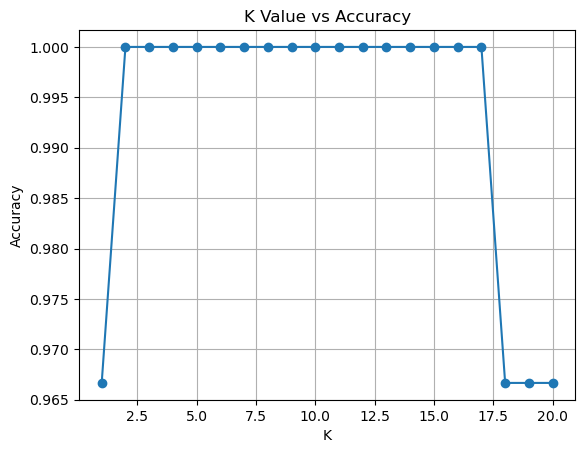

In [7]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

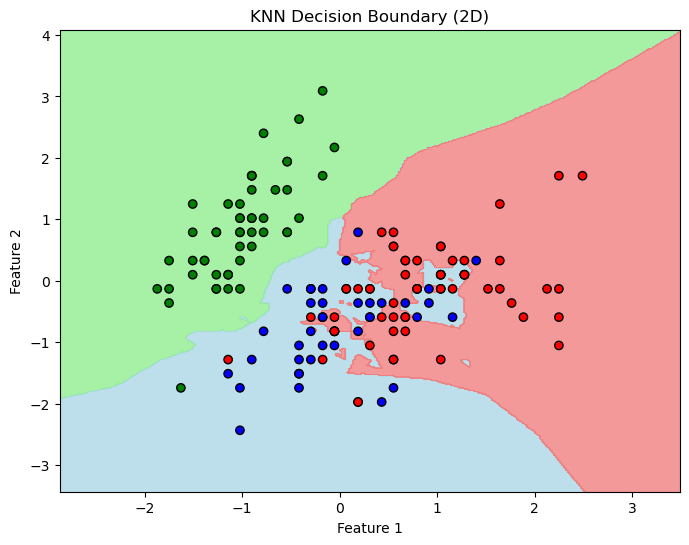

In [8]:

from matplotlib.colors import ListedColormap

X_2d = X_scaled[:, :2]
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train2d, y_train2d)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightgreen', 'lightblue', 'lightcoral']), alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['green', 'blue', 'red']))
plt.title("KNN Decision Boundary (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [9]:

best_k = k_values[np.argmax(accuracies)]
print(f"Best k value: {best_k} with accuracy = {max(accuracies):.2f}")

Best k value: 2 with accuracy = 1.00


In [10]:

import time
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print(f"Prediction Time: {end - start:.4f} seconds")

Prediction Time: 0.0098 seconds


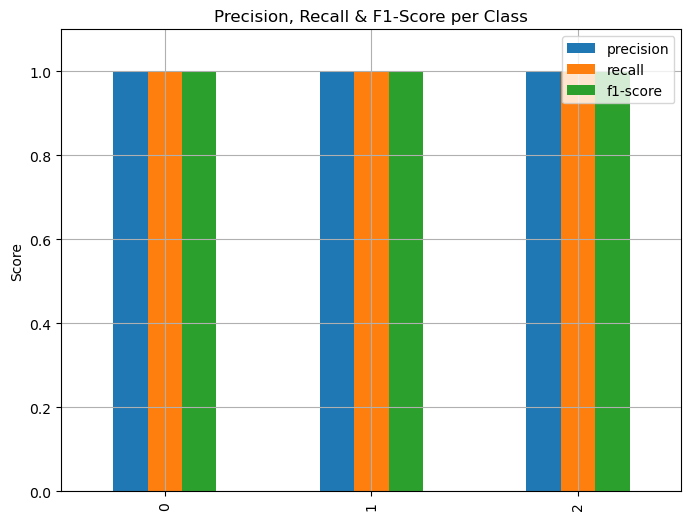

In [11]:

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:3, :3]  # first 3 classes, remove 'accuracy'

df_report.plot(kind='bar', figsize=(8, 6))
plt.title("Precision, Recall & F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()